In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split


  Running setup.py clean for scs


  ERROR: Command errored out with exit status 1:
   command: 'E:\Python\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Work\\AppData\\Local\\Temp\\pip-install-lc7lrqt4\\scs\\setup.py'"'"'; __file__='"'"'C:\\Users\\Work\\AppData\\Local\\Temp\\pip-install-lc7lrqt4\\scs\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Work\AppData\Local\Temp\pip-wheel-0e8wjcg_'
       cwd: C:\Users\Work\AppData\Local\Temp\pip-install-lc7lrqt4\scs\
  Complete output (76 lines):
  Namespace(blas64=False, extraverbose=False, float32=False, gpu=False, int32=False, scs=False)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\scs
  copying src\__init__.py -> build\lib.win-amd64-3.7\scs
  running build_ext
  blas_mkl_info:
      librar

  Running setup.py clean for ecos
Failed to build scs ecos
    Running setup.py install for scs: started
    Running setup.py install for scs: finished with status 'error'


    creating build
    creating build\lib.win-amd64-3.7
    creating build\lib.win-amd64-3.7\scs
    copying src\__init__.py -> build\lib.win-amd64-3.7\scs
    running build_ext
    blas_mkl_info:
        libraries = ['mkl_rt']
        library_dirs = ['E:/Python\\Library\\lib']
        define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
        include_dirs = ['E:/Python\\Library\\include']
    blas_opt_info:
        libraries = ['mkl_rt']
        library_dirs = ['E:/Python\\Library\\lib']
        define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
        include_dirs = ['E:/Python\\Library\\include']
    lapack_mkl_info:
        libraries = ['mkl_rt']
        library_dirs = ['E:/Python\\Library\\lib']
        define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
        include_dirs = ['E:/Python\\Library\\include']
    lapack_opt_info:
        libraries = ['mkl_rt']
        library_dirs = ['E:/Python\\Library\\lib']
        define_macros = [('SCIPY_MKL_H'

In [2]:
!pip install PyPortfolioOpt

  Using cached PyPortfolioOpt-1.4.1-py3-none-any.whl (56 kB)
  Using cached cvxpy-1.1.11-cp37-cp37m-win_amd64.whl (819 kB)
  Using cached scs-2.1.2.tar.gz (3.5 MB)
  Using cached osqp-0.6.2.post0-cp37-cp37m-win_amd64.whl (162 kB)
  Using cached ecos-2.0.7.post1.tar.gz (126 kB)
  Using cached qdldl-0.1.5.post0-cp37-cp37m-win_amd64.whl (75 kB)
  Running setup.py clean for scs
  Running setup.py clean for ecos
Failed to build scs ecos
    Running setup.py install for scs: started
    Running setup.py install for scs: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'E:\Python\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Work\\AppData\\Local\\Temp\\pip-install-e9ao3i1g\\scs\\setup.py'"'"'; __file__='"'"'C:\\Users\\Work\\AppData\\Local\\Temp\\pip-install-e9ao3i1g\\scs\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Work\AppData\Local\Temp\pip-wheel-q67pdq_d'
       cwd: C:\Users\Work\AppData\Local\Temp\pip-install-e9ao3i1g\scs\
  Complete output (76 lines):
  Namespace(blas64=False, extraverbose=False, float32=False, gpu=False, int32=False, scs=False)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\scs
  copying src\__init__.py -> build\lib.win-amd64-3.7\scs
  running build_ext
  blas_mkl_info:
      librar

In [3]:
tickers = ["GE", "PFE","SBUX"]
stocks = pd.concat([yf.Ticker(i).history(period = "max")["Close"].pct_change().dropna().rename(i) for i in tickers], axis=1, join = 'inner')

<AxesSubplot:xlabel='Date'>

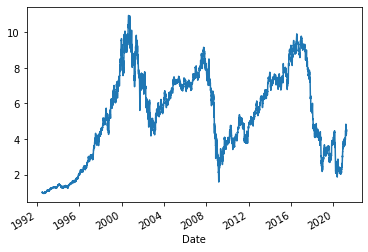

In [4]:
(1+stocks["GE"]).cumprod().plot()


In [5]:

def get_weights(data, mean, std, covar):
    

    #mean = [i.mean() for i in stocks]
    #std = [i.std() for i in stocks]
    
    n = data.count()
    r0 = mean[1] #r-naught for calculation 
    covar_inverse = np.linalg.inv(covar.values)
    #np.matmul(covar_inverse, covar)

    ones_column = np.ones((len(data.columns), 1))
    mu_matrix = np.hstack((mean, ones_column))

    returns_matrix = np.vstack((r0,np.array([[1]]))) 

    A = np.zeros((2, 2))
    A[0,0] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, mean))
    A[0,1] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, ones_column))
    A[1,0] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, ones_column))
    A[1,1] = np.matmul(np.transpose(ones_column), np.linalg.solve(covar.values, ones_column))

    return np.linalg.solve(covar.values, np.matmul(mu_matrix, np.linalg.solve(A, returns_matrix)))
    

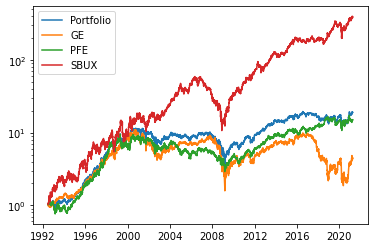

In [6]:
mean = stocks.mean(axis=0).values.reshape((len(tickers), 1))
std = stocks.std(axis=0)
covar = stocks.cov()
weight_vector = get_weights(stocks, mean, std, covar)
portfolio_ps = stocks.dot(weight_vector)
plt.figure()
plt.plot((1+portfolio_ps).cumprod(), label="Portfolio")
for ticker in stocks:
    plt.plot((1+stocks[ticker]).cumprod(), label=ticker)
plt.yscale("log")
plt.legend()

In [7]:
weight_vector

array([[0.36258554],
       [0.56904219],
       [0.06837228]])

In [8]:
stocks.dot(weight_vector).mean()
stocks.dot(weight_vector).std()

0    0.014577
dtype: float64

In [9]:
stocks["PFE"].mean()
stocks["PFE"].std()

0.016762247763443757

In [10]:
[stock_samples] = np.random.normal((i for i in mean), std, n)
histograms = [i.hist(bins=100, density=True, axis = 1) for i in stocks]
std_histograms = plt.hist(samples, bins=100, density=True, alpha = 0.5)
plt.yscale('log')

NameError: name 'n' is not defined

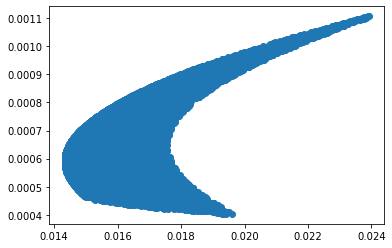

In [11]:
def get_random_weights():
    random = np.random.random(2)     
    return np.diff(np.concatenate(([0], sorted(random),[1])))

random_weights = [get_random_weights() for i in range(10000)]
means = [stocks.dot(weight).mean() for weight in random_weights]
stds = [stocks.dot(weight).std() for weight in random_weights]
plt.scatter(stds, means)

In [ ]:
stocks.mean()

In [ ]:
stocks.resample("7D").std().plot()

In [ ]:
plt.scatter(stocks["GE"].shift(1).dropna(), stocks["GE"].iloc[1:])

In [ ]:
plt.scatter(stocks["GE"].rolling("7d").std().shift(1).dropna(), stocks["GE"].rolling("7d").std().dropna().iloc[1:])

In [ ]:
X = stocks["GE"].resample("7d").std().shift(1).dropna().iloc[:-1]
Y = stocks["GE"].resample("7d").std().dropna().iloc[1:]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, train_size = 0.7)
X

In [ ]:
plt.scatter(X,Y)

In [ ]:
xgb_instance = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 100000, learning_rate = 0.08, gamma=0, subsample=0.75, colsample_bytree=1)

In [ ]:
train_X.values


In [ ]:
xgb_instance.fit(train_X.values.reshape((len(train_X), 1)), train_Y.values)

In [ ]:
y_pred = xgb_instance.predict(test_X.values.reshape((len(test_X), 1)))

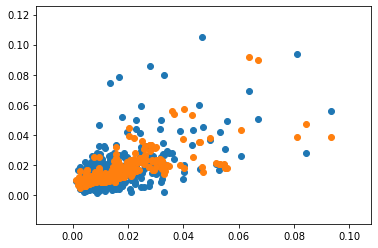

In [59]:
plt.scatter(test_X, test_Y)
plt.scatter(test_X, y_pred)

In [35]:
#Troubleshooting weights function
def get_weights(r0, mean, std, covar):
   
    #mean = [i.mean() for i in stocks]
    #std = [i.std() for i in stocks]
    
    n = len(mean)
    mean = mean.values.reshape((n,1))
    #np.matmul(covar_inverse, covar)
    ones_column = np.ones((n, 1))
    mu_matrix = np.hstack((mean, ones_column))

    returns_matrix = np.vstack((r0,np.array([[1]]))) 

    A = np.zeros((2, 2))
    A[0,0] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, mean))
    A[0,1] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, ones_column))
    A[1,0] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, ones_column))
    A[1,1] = np.matmul(np.transpose(ones_column), np.linalg.solve(covar.values, ones_column))

    return np.linalg.solve(covar.values, np.matmul(mu_matrix, np.linalg.solve(A, returns_matrix)))

mean = stocks.mean()
std = stocks.std()
covar = stocks.cov()
r0s = np.linspace(mean.min(), mean.max(), 1000)

data_x = []
data_y = []
for r0 in r0s:
    weights_vector = get_weights(r0, mean, std, covar)
    portfolio = stocks.dot(weights_vector)
    data_x.append(portfolio.mean())
    data_y.append(portfolio.std())


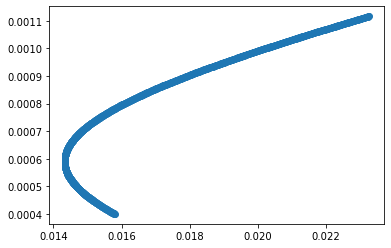

In [37]:
plt.scatter(data_y, data_x)